<a href="https://colab.research.google.com/github/Partha-SUST16/GCEmotion/blob/master/GCEMotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Commit Message

In [1]:
class CommitMessage:
    def __init__(self, encoded_message):
        self.encoded_message = encoded_message
        self.commit_title = ''
        self.commit_body = ''

    def get_commit_title(self):
        commit_title = self.to_string().splitlines()[0]
        return commit_title

    def get_commit_body(self):
        body_lines = self.to_string().splitlines()
        if len(body_lines) <= 1:
            return self.commit_body
        else:
            body_lines.pop(0)
            return '\n'.join(body_lines)

    def to_string(self):
        decoded_message = bytes.fromhex(self.encoded_message).decode('utf-8')
        return decoded_message

# Calculate Score

In [51]:
import sys
import re


def calculate_total_commit_score(commit_hex_string):
    """
    Calculate total commit score summing the 11 Quality Measures Metrics
    :param commit_hex_string: commit message in the form of hex string
    :return: total commit score
    """
    total_score = 0
    commit_message = CommitMessage(commit_hex_string)
    commit_title = commit_message.get_commit_title()
    commit_body = commit_message.get_commit_body()
    # score calculated from title
    total_score += count_title_length(commit_title)
    total_score += tittle_ended_with_dot(commit_title)
    total_score += capitalized_word_in_tittle(commit_title)
    total_score += number_of_and_or_in_tittle(commit_title)
    total_score += number_of_file_name_in_tittle(commit_title)
    total_score += number_of_external_references_in_tittle(commit_title)
    total_score += imperative_mood_in_tittle(commit_title)
    # # score calculated from body
    total_score += has_commit_body(commit_body)
    total_score += number_of_file_name_in_body(commit_body)
    total_score += number_of_external_references_in_commit_body(commit_body)
    total_score += number_of_paragraph_in_commit_body(commit_body)
    return total_score


def count_title_length(commit_title):
    """
    QM1: Calculate score based on "Length of title"
    score = if (0 or >72)->1; if(1–10)->2; if(11–30)->3; if(31–50)->4; if (51–72)->5
    :param commit_title: commit message subject line
    :return: Normalized score = (ActualScore/MaxScore)
    """
    length = len(commit_title)
    score = 0
    if (length == 0) or (length > 72):
        score = 1
    elif (length >= 1) and (length <= 10):
        score = 2
    elif (length >= 11) and (length <= 30):
        score = 3
    elif (length >= 31) and (length <= 50):
        score = 4
    elif (length >= 51) and (length <= 72):
        score = 5
    return score / 5.0


def tittle_ended_with_dot(commit_title):
    """
    QM2: Calculate score based on "Title ends with dots"
    score= if(true)->1; if(false)->0;
    :param commit_title: commit message subject line
    :return: 1 or 0
    """
    length = len(commit_title)
    if length < 1:
        return 0
    if commit_title[-1] == '.':
        return 1
    else:
        return 0


def capitalized_word_in_tittle(commit_title):
    """
    QM3: Calculate score based on "Title first character capital"
    score= if(true)->1; if(false)->0;
    :param commit_title: commit message subject line
    :return: 1 or 0
    """
    length = len(commit_title)
    if length < 1:
        return 0
    if commit_title[0].isupper():
        return 1
    return 0


def number_of_and_or_in_tittle(commit_title):
    """
    QM4: Calculate score based on "Count number of “and” “or” in title"
    score = if (>6)->1; if(5–6)->2; if(3–4)->3; if(1-2)->4; if (0)->5;
    :param commit_title: commit message subject line
    :return: Normalized score = (ActualScore/MaxScore)
    """
    count = count_token_frequency(commit_title, 'and')
    count += count_token_frequency(commit_title, 'or')
    score = score_from_title(count)
    return score / 5.0


def number_of_file_name_in_tittle(commit_title):
    """
    QM5: Calculate score based on "Count number of “file name” in title"
    :param commit_title: commit message subject line
    :return: Normalized score = (ActualScore/MaxScore)
    """
    file_name_pattern = ""
    count = count_pattern_frequency(commit_title, file_name_pattern)
    score = score_from_title(count)
    return score / 5.0


def number_of_external_references_in_tittle(commit_title):
    """
    QM6: Calculate score based on "Count number of external references in title"
    :param commit_title: commit message subject line
    :return: Normalized score = (ActualScore/MaxScore)
    https://www.w3resource.com/python-exercises/re/python-re-exercise-42.php
    """
    reference_number_pattern = "#(\\w+)"
    external_link_pattern = "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
    count = count_pattern_frequency(commit_title, reference_number_pattern)
    count += count_pattern_frequency(commit_title, external_link_pattern)
    score = score_from_title(count)
    return score / 5.0


def imperative_mood_in_tittle(commit_title):
    """
    QM7: Calculate score based on "Imperative mode in title"
    score= if(true)->1; if(false)->0;
    :param commit_title: commit message subject line
    :return: 1 or 0
    """
    commit_title = commit_title.lower().strip()
    verbs = retrieve_imperative_verbs()
    tokens = commit_title.split()
    for v in verbs:
        if v in tokens:
            return 1
    return 0


def has_commit_body(commit_body):
    """
    QM8: Calculate score based on "Commit body existence"
    score= if(true)->1; if(false)->0;
    :param commit_body: commit message body
    :return: 1 or 0
    """
    if commit_body != '':
        return 1
    else:
        return 0


def number_of_file_name_in_body(commit_body):
    """
    QM9: Calculate score based on "Count number of “file name” in body"
    :param commit_body: commit message body
    :return: Normalized score = (ActualScore/MaxScore)
    """
    file_name_pattern = ""
    count = count_pattern_frequency(commit_body, file_name_pattern)
    score = score_from_body(count)
    return score / 5.0


def number_of_external_references_in_commit_body(commit_body):
    """
    QM10: Calculate score based on "Count number of external references in body"
    :param commit_body: commit message body
    :return: Normalized score = (ActualScore/MaxScore)
    https://www.w3resource.com/python-exercises/re/python-re-exercise-42.php
    """
    reference_number_pattern = "#(\\w+)"
    external_link_pattern = "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
    count = count_pattern_frequency(commit_body, reference_number_pattern)
    count += count_pattern_frequency(commit_body, external_link_pattern)
    score = score_from_body(count)
    return score / 5.0


def number_of_paragraph_in_commit_body(commit_body):
    """
    QM11: Calculate score based on "Count number of paragraph 0 in body"
    :param commit_body: commit message body
    :return: Normalized score = (ActualScore/MaxScore)
    """
    #print(commit_body)
    score = 1
    count = len(str(commit_body).splitlines())
    #print('count:---->'+count)
    if count == 0:
        score = 1
    elif count > 10:
        score = 2
    elif (count >= 5) and (count <= 10):
        score = 3
    elif (count >= 3) and (count <= 4):
        score = 4
    elif (count == 1) and (count == 2):
        score = 5

    return score / 5.0


def count_token_frequency(stream, token):
    """
    Count frequency of a token for a given string
    :param stream: Given String
    :param token: Given token
    :return: frequency
    """
    frequency = 0
    stream = stream.lower().strip()
    tokens = stream.split()
    for t in tokens:
        if t == token:
            frequency += 1
    return frequency


def count_pattern_frequency(stream, pattern):
    """
    Count frequency of a regex pattern for a given string
    :param stream: Given string to detect pattern
    :param pattern: regex pattern to identify
    :return: frequency
    https://stackoverflow.com/questions/1374457/find-out-how-many-times-a-regex-matches-in-a-string-in-python
    """
    count = len(re.findall(pattern, stream))
    return count


def score_from_title(count):
    """
    Calculate score for commit message tittle based on the count
    score = if (>6)->1; if(5–6)->2; if(3–4)->3; if(1-2)->4; if (0)->5;
    :param count: count value
    :return: generalized score
    """
    score = 0
    if count > 6:
        score = 1
    elif (count == 5) or (count == 6):
        score = 2
    elif (count == 3) or (count == 4):
        score = 3
    elif (count == 1) or (count == 2):
        score = 4
    elif count == 0:
        score = 5
    return score


def score_from_body(count):
    """
    Calculate score for commit message body based on the count
    score = if (0)->1; if(>10)->2; if(5–10)->3; if(3-4)->4; if (1-2)->5
    :param count: count value
    :return: generalized score
    """
    score = 0
    if count == 0:
        score = 1
    elif count > 10:
        score = 2
    elif (count >= 6) and (count <= 10):
        score = 3
    elif (count >= 3) and (count <= 5):
        score = 4
    elif (count == 1) and (count == 2):
        score = 5
    return score


def retrieve_imperative_verbs():
    """
    Retrieve a list of imperative verbs possibly should be presented in the commit tittle.
    :return: A set of predefined imperative verbs
    """
    imperative_verbs = {"fix", "patch", "close", "refactor", "update", "add", "remove",
                        "delete", "release", "move", "split", "introduce", "decompose", "reorganize", "extract",
                        "merge", "rename",
                        "change", "restructure", "reformat", "extend", "replace", "rewrite", "simplify", "create",
                        "improve",
                        "modify", "enhance", "rework", "inline", "redesign", "cleanup", "reduce"}
    return set(map(lambda x: x.lower(), imperative_verbs))


# Categorize Commit Message

In [3]:
import csv
from io import TextIOWrapper
from zipfile import ZipFile
import sys

In [65]:
data_path = '/content/drive/MyDrive/GCEMotion/popular-4K-commit-messages.csv.zip'
output_path = '/content/drive/MyDrive/GCEMotion/popular-4K-commit-messages-score.csv'
csv.field_size_limit(sys.maxsize)

output_file_headers = ['Score','HexMessage']

with ZipFile(data_path) as zf:
    with zf.open('popular-4K-commit-messages.csv', 'r') as infile:
        reader = csv.reader(TextIOWrapper(infile, 'utf-8'))
        count = 0
        countError = 0
        with open(output_path, 'w', encoding='UTF8', newline='') as f:
          writer = csv.DictWriter(f, fieldnames=output_file_headers)
          writer.writeheader()
          for row in reader:
              # process the CSV here
              count += 1
              try:
                  # if count == 500:
                  #       break
                  if row:
                      commit_score = calculate_total_commit_score(row[0])
                      # print(str(count) + ">>=====================================\n")
                      # print(commit_score)
                      # print("=====================================\n")
                      writer.writerow({'Score':commit_score, 'HexMessage': row[0]})
              except Exception as e:
                  countError += 1
                  print("*ERROR No: "+str(countError)+" RowNumber: "+str(count)+" " +"HexMessage: "+row[0]+" "+ str(e)+" ")

*ERROR No: 1 RowNumber: 21741 HexMessage: 56344c2f445642202834373835293a204275646765742d63693a204368616e67652044454249414444525f495220746f20612073616665722064656661756c740a0a546865204952206368697020686173206e6f2061646472657373206465636f64696e672c20736f20746865204952206461746120697320616c776179732070726573656e7420696e200a74686520686967682062797465207768656e20646f696e67206120726561642066726f6d20746865207361613731343620636869702e2054686973206d65616e732074686174200a74686520444542492061646472657373207573656420697320697272656c6576616e7420746f20746865204952206465636f64696e67206c6f6769632e0a44454249206164647265737365732030783158585820617265206d617070656420746f2074686520726567697374657273206f6e20746865204349206d6f64756c65200a697473656c662c20627574206f6e6c7920746865206c6f776573742074776f2062697473206172652061637475616c6c792075736564202873656520454e35303232312c200a73656374696f6e20412e322e322e31292c206d65616e696e67207468617420307831323334206973206571756976616c656e7420746f20307831303030207768696368

# Plot the CSV Output

In [79]:
# Import Libraries
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots


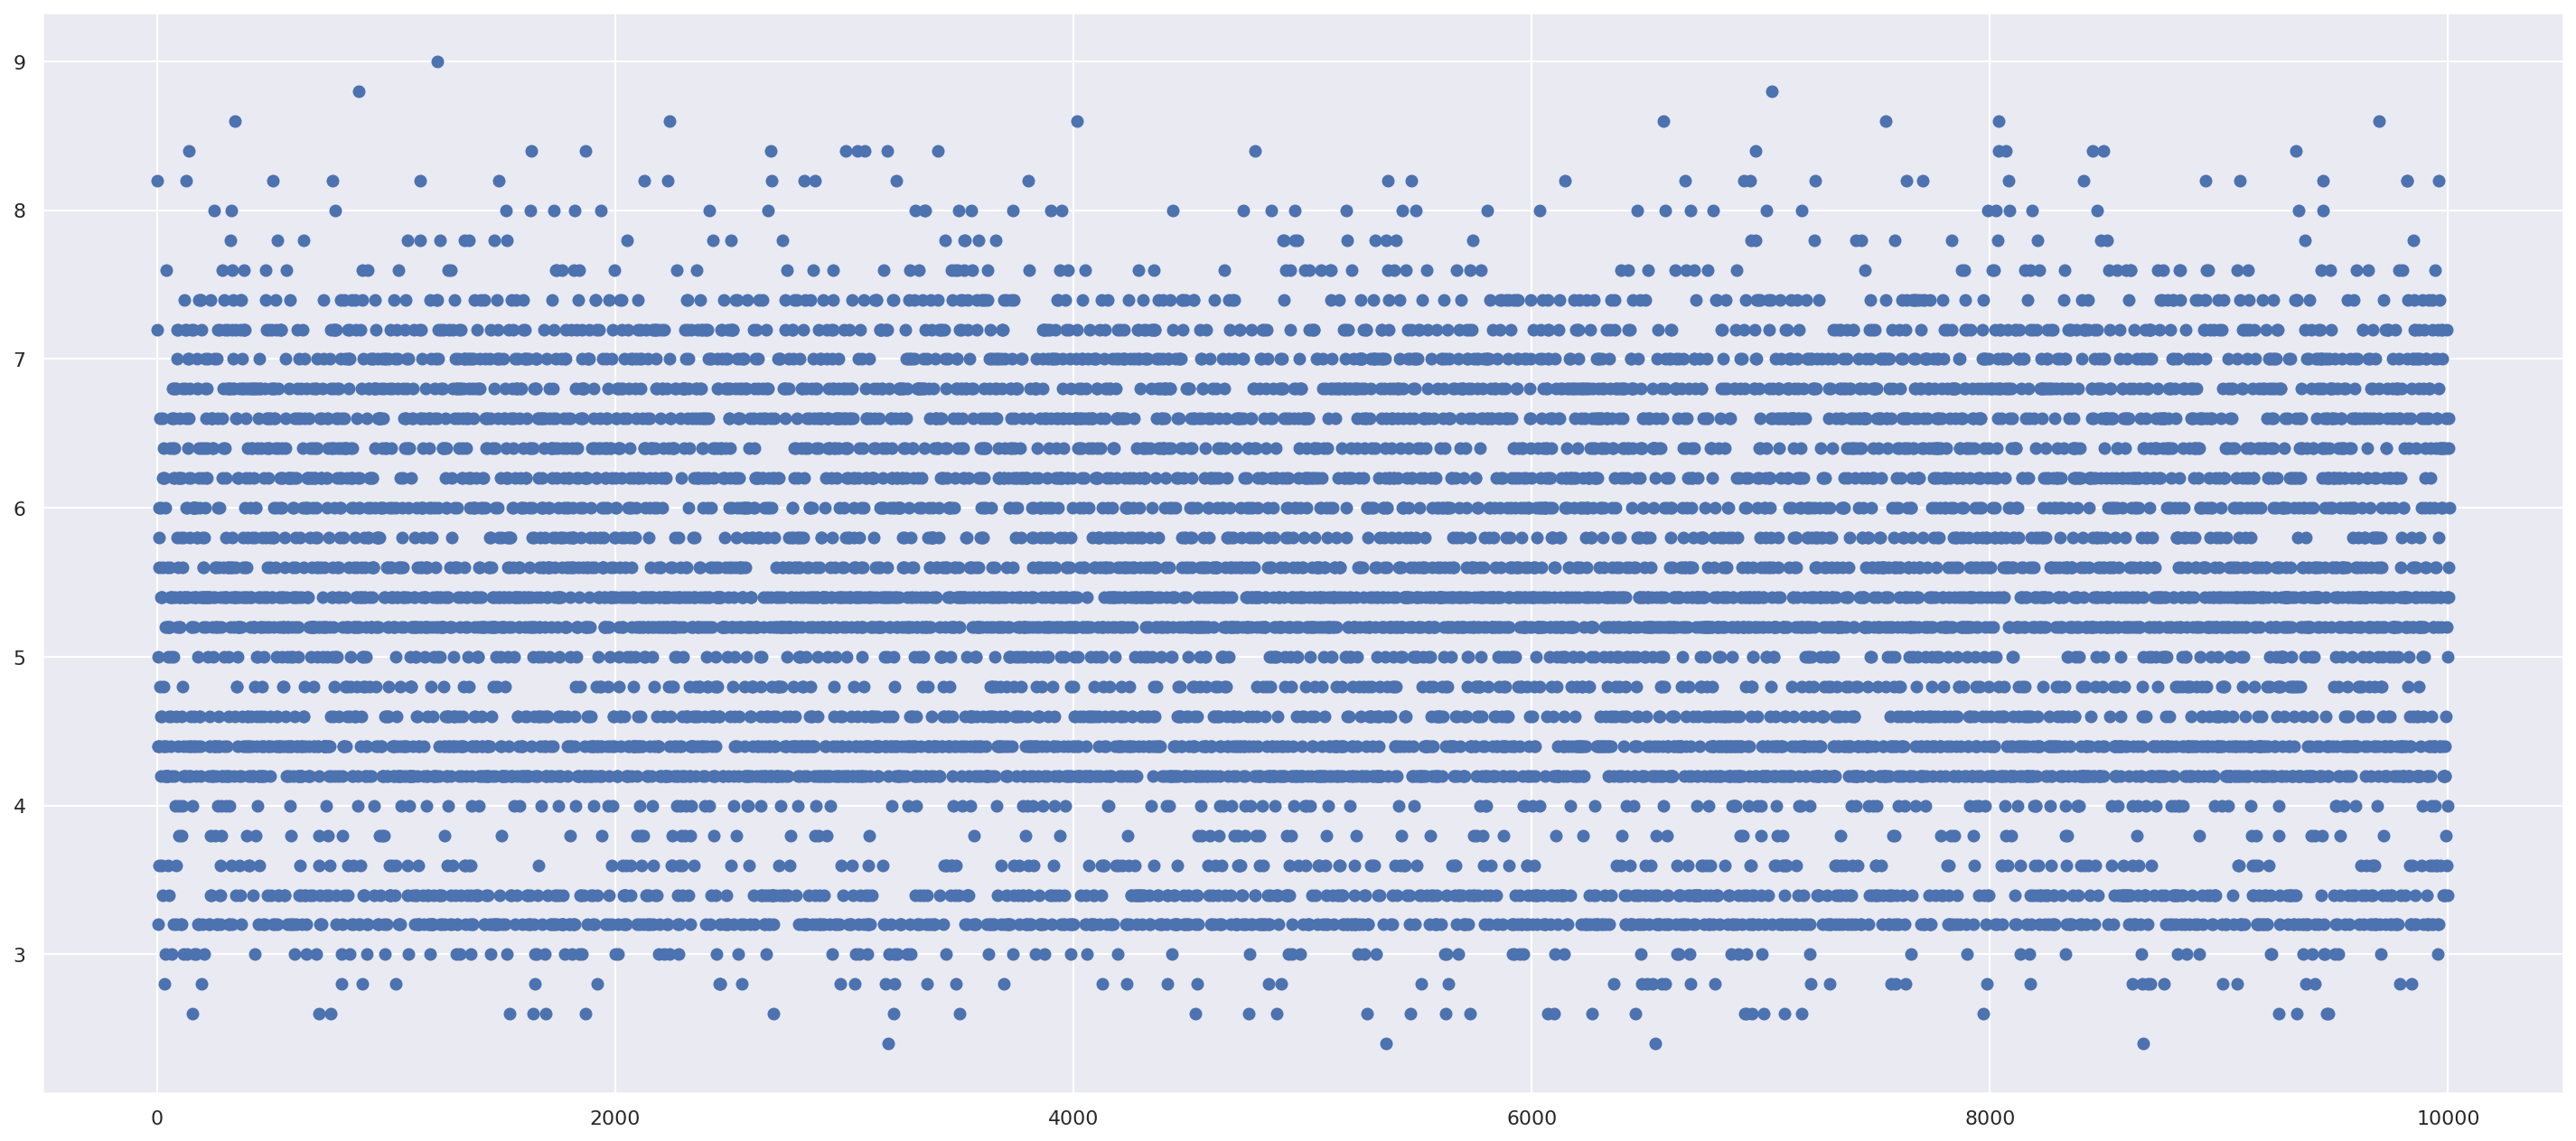

In [101]:
from IPython.core.pylabtools import figsize
score_path = '/content/drive/MyDrive/GCEMotion/popular-4K-commit-messages-score.csv'
import csv

with open(score_path, 'r') as infile:
  reader = csv.reader(infile)
  count = 0
  x = []
  y = []
  # x.append(0)
  # y.append(0)
  #plt.plot(1,2,2,3)
  for row in reader:
    if count!=0:
      x.append(count)
      y.append(float(row[0]))
    count += 1
    if count>10005:
      break

  plt.figure(figsize=(25,11)) 
  plt.plot(np.array(x),np.array(y),'o')
  plt.show()